In [74]:
import random as rd
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [75]:
mu1 = -1
mu2 = 3
sig1 = 0.5
sig2 = 1
N = 100
np.random.seed(10)
x11=np.random.randn(N,1)*sig1 + mu1
x12=np.random.randn(N,1)*sig1 + mu1+3
x21=np.random.randn(N,1)*sig2 + mu2
x22=np.random.randn(N,1)*sig2 + mu2+3
c = np.vstack((-np.ones((N,1)), np.ones((N,1))))
x1 = np.hstack((x11,x12))
x2 = np.hstack((x21,x22))

In [76]:
X = np.hstack( (np.vstack( (x1,x2) ),c) )
np.random.shuffle(X)

In [77]:
dataset = pd.DataFrame(data=X, columns=['x','y','c'])

Information about the data

In [78]:
dataset.head()

,x,y,c
0,-0.334207,2.058738,-1.0
1,3.264395,5.636814,1.0
2,-0.669884,1.856185,-1.0
3,1.995284,4.484924,1.0
4,3.588041,4.739172,1.0


In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
x    200 non-null float64
y    200 non-null float64
c    200 non-null float64
dtypes: float64(3)
memory usage: 4.8 KB


Visualization of the data

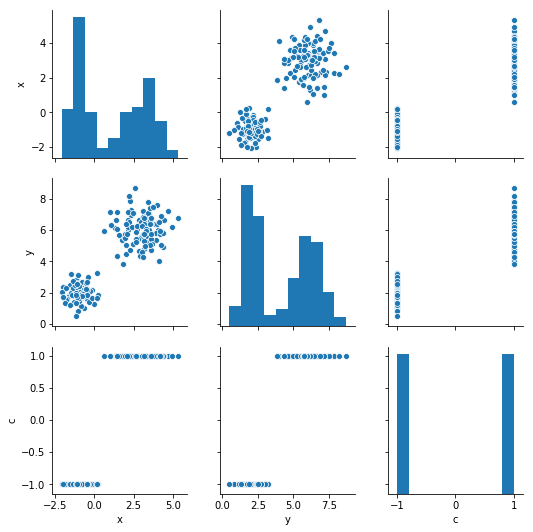

In [80]:
sns.pairplot(dataset)

## K-Means pseudo code from https://towardsdatascience.com/k-means-clustering-introduction-to-machine-learning-algorithms-c96bf0d5d57a
1. Choose the number of clusters(K) and obtain the data points 
2. Place the centroids c_1, c_2, ..... c_k randomly 
3. Repeat steps 4 and 5 until convergence or until the end of a fixed number of iterations
4. for each data point x_i:
       - find the nearest centroid(c_1, c_2 .. c_k) 
       - assign the point to that cluster 
5. for each cluster j = 1..k
       - new centroid = mean of all points assigned to that cluster
6. End 

Using class

In [163]:
np.random.seed(5)
a = np.random.permutation(5)

In [164]:
a

array([4, 0, 1, 2, 3])

In [158]:
class K_Means:
    
    # contstructor of our class K-means with 2 clusters and 10 number of iterations
    def __init__(self, k=2, max_iteration = 10,epoch=5):
        
        self.k = k
        self.max_iteration = max_iteration
        self.epoch=epoch
        
        
    #compute the euclidienne distance between two given  points
    def compute_distance(self, point1, point2):
        
        return ((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)**0.5
     
    def cost(self, clusters,centroids):
        loss_arr=list()
        for center_index in range(len(clusters)):
            summation=0
            diff = clusters[center_index] - centroids[center_index]
            norm_square=(np.linalg.norm(diff))**2
            loss_arr.append(norm_square)
        loss = np.sum(loss_arr) 
        return loss
        
    #method in which we fit our model    
    def fit(self, data):
        
        
        
        general_dict = dict()
        while self.epoch>0:
            general_dict[self.epoch]=dict()
            #let us shuffle the data
            shuffle_vector=np.random.permutation(len(data))
            data_shuffle=np.array(data)[shuffle_vector.astype(int)]
            #let the first K points from the dataset be the initial centroids
            self.centroids = {}
            for i in range(self.k):
                #self.centroids[i] = data[i]
                self.centroids[i] = data_shuffle[i]
                
            general_dict[self.epoch].update({'center':self.centroids }) 
            
            for i in range(self.max_iteration):

                #create classifications the size of K
                self.clusters = {}
                for j in range(self.k):
                    self.clusters[j] = []

                #find the distance between the points and the centroids

                for point in data:
                    list_distances = []
                    for index_center in self.centroids:
                        list_distances.append(self.compute_distance(point,self.centroids[index_center]))

                    #print(list_distances)  

                    #find which cluster the datapoint belongs to by finding the minimum
                    cluster_index = np.argmin(list_distances)

                    self.clusters[cluster_index].append(point)

                #find new centroid by taking the centroid of the points in the cluster class
                for cluster_index in self.clusters:
                    self.centroids[cluster_index] = np.average(self.clusters[cluster_index], axis = 0)
            #set_clusters.append(self.clusters)
            #set_centroids.append(self.centroids)
            loss= self.cost(self.clusters,self.centroids)
            general_dict[self.epoch].update({'data':self.clusters }) 
            general_dict[self.epoch].update({'loss':loss }) 
            self.epoch-=1
        return  general_dict
            

Let us test our class

In [149]:

K = 2
data=dataset.drop('c', axis=1)
data= data.values.tolist()

       
k_means = K_Means(K)
    
clustering= k_means.fit(data)

[clustering[i]['loss'] for i in clustering ]

[218.1791959414419,
 218.1791959414419,
 218.1791959414419,
 218.1791959414419,
 218.1791959414419]

In [123]:
#print('cluster 0 is:\n\n {}  \n\ncluster 1 is: \n\n {} \n\nand the centroid is: \n\n{}'
  #    .format(cluster[0],cluster[1], centroid))
#clustering['Points of the cluster'][0]

dicti=dict()
print(dicti)
for i in range(3):
    dicti[i]=range(3)

    dicti[0]=dict()
    dicti[0].update({'data':49})
    dicti[0].update({'loss':9})
print(dicti)

{}
{0: {'data': 49, 'loss': 9}, 1: range(0, 3), 2: range(0, 3)}


visualisation

In [92]:
x1 = np.array([i[0] for i in clustering['Points of the cluster'][0]+clustering['Points of the cluster'][1]]).reshape(-1,1)
x2 = np.array([i[1] for i in clustering['Points of the cluster'][0]+clustering['Points of the cluster'][1]]).reshape(-1,1)
c = np.array([1 for i in range(len(clustering['Points of the cluster'][0]))]
             +[2 for i in range(len(clustering['Points of the cluster'][1]))]).reshape(-1,1)
#print(len(x2))
X = np.hstack([x1,x2,c])
#print(X.shape)
np.random.shuffle(X)
data_set = pd.DataFrame(data=X, columns=['x1','x2','c1'])


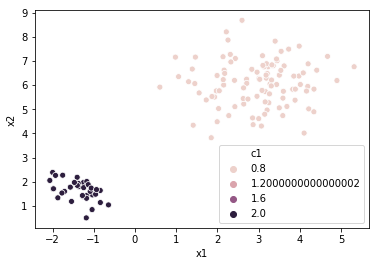

In [93]:
sns.scatterplot(x="x1",y="x2",hue="c1",data=data_set)

In [86]:
dataset.columns

Index(['x', 'y', 'c'], dtype='object')

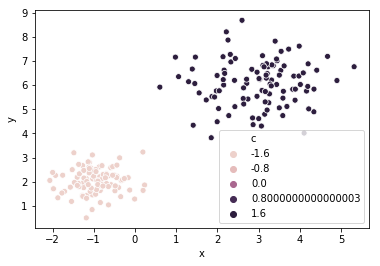

In [87]:
sns.scatterplot(x='x',y='y',hue='c',data=dataset)

In [167]:
from random import sample 
list1 = [1, 2, 3, 4, 5]  
  
print(sample(list1,3)) 

[1, 2, 5]


In [168]:
d= [5252,75758,85858]
d
for i in enumerate(d):
   print(i)

(0, 5252)
(1, 75758)
(2, 85858)


In [24]:
p=np.random.permutation(len(data))


In [42]:
data_shuffle=data[:]

In [34]:
data_shuffle

[-0.33420674793524097, 2.0587378305133193]

In [47]:
out_images = np.array(data)[p.astype(int)]
data

[[-0.33420674793524097, 2.0587378305133193],
 [3.264394691630712, 5.636813798572831],
 [-0.6698842243868435, 1.8561852931747096],
 [1.9952836474739046, 4.484924320649972],
 [3.588040593808861, 4.739172194345859],
 [-1.9888641403289535, 1.7134433192202052],
 [2.8359247093226, 6.653662314329918],
 [-1.2508644497974335, 1.9717396384587047],
 [2.1529837469551465, 6.004102038558738],
 [2.962082117986966, 5.537159114403732],
 [3.084139555391751, 5.780739735997001],
 [-1.5225662687572188, 2.5034305693124113],
 [3.356939067005643, 6.804267357691739],
 [5.319127317627481, 6.7594713311328745],
 [4.6740755455912115, 7.188316753984644],
 [1.3015985088380866, 6.140246866805074],
 [1.058700318977572, 6.349476408667366],
 [-1.2446686084423257, 1.759606329933988],
 [3.2491786578863353, 5.270600777528749],
 [3.095763236737718, 7.214782650080172],
 [-0.6423605128007972, 1.0462715559377997],
 [-1.1812495915778203, 2.1370863903800537],
 [2.327976563531654, 6.957711239687686],
 [3.2278173638452077, 6.75662

In [48]:
out_images

array([[ 2.13724170e+00,  7.17373241e+00],
       [-1.08730011e+00,  1.60636554e+00],
       [-3.98481313e-01,  1.76459637e+00],
       [ 3.54054071e+00,  6.60928227e+00],
       [-1.48253284e+00,  3.20216280e+00],
       [-1.36004278e+00,  1.79993082e+00],
       [ 3.30866767e+00,  5.96607300e+00],
       [-8.42623111e-01,  1.64360028e+00],
       [-1.16957012e+00,  1.43844798e+00],
       [ 3.10581208e+00,  6.81522068e+00],
       [-1.24466861e+00,  1.75960633e+00],
       [ 3.32338993e+00,  6.83708178e+00],
       [ 1.73018041e+00,  5.38569515e+00],
       [ 2.42508234e+00,  5.10881308e+00],
       [ 1.41344824e+00,  4.34139529e+00],
       [ 4.19435060e+00,  5.94640550e+00],
       [ 2.04646758e+00,  5.76491777e+00],
       [ 3.01102270e+00,  6.26957242e+00],
       [ 3.60202227e+00,  5.74471955e+00],
       [ 1.92483665e-01,  3.23266254e+00],
       [ 2.15298375e+00,  6.00410204e+00],
       [ 3.50392690e+00,  6.41160241e+00],
       [ 1.93143229e+00,  5.50685926e+00],
       [-6.

In [94]:
len({'0':1,'2':3})

2